R-squared (R²) for Train Data: 0.9291390185046546
Mean Absolute Error (MAE) for Train Data: 62.248802380869705
Root Mean Squared Error (RMSE) for Train Data: 89.5050455456519


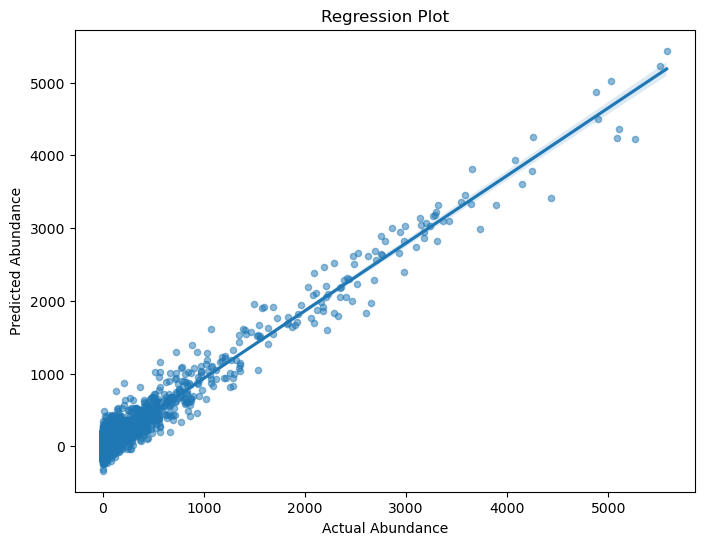

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# Load the data
def load_data(file_path):
    data = pd.read_excel(file_path)
    return data

# Detecting outliers using Z-scores
def detect_outliers_zscore(data, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers[col] = z_scores > threshold
    return outliers

# Preprocess the data
def preprocess_data(data):
    # Handle missing values
    data['Nc'] = data['Nc'].replace('*****', '0').astype('float')

    # Robust Scaling (less sensitive to outliers)
    scaler = RobustScaler()
    data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']] = scaler.fit_transform(data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']])

    # Drop unnecessary columns
    data = data.drop(columns=['string_external_id', 'Uniprot_ID', 'CBI'], axis=1)

    return data

# Train the model with polynomial features
def train_model(X, y):
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    model_train = LinearRegression()
    model_train.fit(X_poly, y)

    return model_train

if __name__ == "__main__":
    file_path = r"C:\Users\shraj\OneDrive\Desktop\freelance-20231007T095553Z-001\freelance\eleg_Final_complied.xls"
    data = load_data(file_path)
    data = preprocess_data(data)

    X = data.drop('abundance', axis=1)
    y = data['abundance']

    model_train = train_model(X, y)

    # Transform the entire dataset with polynomial features
    X_poly = PolynomialFeatures(degree=2).fit_transform(X)

    # Predict on the entire dataset
    y_pred_train = model_train.predict(X_poly)

    mse_train = mean_squared_error(y, y_pred_train)
    r_squared_train = r2_score(y, y_pred_train)
    mae_train = mean_absolute_error(y, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    print("R-squared (R²) for Train Data:", r_squared_train)
    print("Mean Absolute Error (MAE) for Train Data:", mae_train)
    print("Root Mean Squared Error (RMSE) for Train Data:", rmse_train)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot')
plt.show()

In [62]:
# Print regression equation as a text diagram
def print_regression_diagram(model, feature_names):
    # Extract coefficients and features for the regression equation
    coef = model.coef_
    equation = "y = {:.4f}".format(model.intercept_)
    for i, (c, f) in enumerate(zip(coef[1:], feature_names[1:])):
        equation += " + {:.4f} * {}".format(c, f)

    # Create a text-based diagram
    diagram = "Regression Equation:\n"
    diagram += "+" + "-" * 50 + "+\n"
    diagram += "| {:<50} |\n".format(equation)
    diagram += "+" + "-" * 50 + "+"

    # Print the text diagram
    print(diagram)

# Example usage
# Assuming you have already trained the model and have feature_names
print_regression_diagram(model_train, X.columns)


Regression Equation:
+--------------------------------------------------+
| y = 227788833561.3133 + -44763094807.7026 * Ala_GCC + -44618264126.1435 * Ala_GCA + -47692187298.4907 * Ala_GCG + -43402163924.7972 * Cys_UGU + -40086034.8223 * Cys_UGC + -696721788.8870 * Asp_GAU + 12494481808.4301 * Asp_GAC + -1068751248.7455 * Glu_GAA + 13579796712.7001 * Glu_GAG + 7800919497.1080 * Phe_UUU + 12880163259.4667 * Phe_UUC + -3276107586.1323 * Gly_GGU + 4361895844.6086 * Gly_GGC + 7142762986.9327 * Gly_GGA + -1099958573.9820 * Gly_GGG + 7990374830.4492 * His_CAU + 3210733806.0424 * His_CAC + 830834988.3440 * Ile_AUU + -52770695668.4542 * Ile_AUC + -45845247422.1599 * Ile_AUA + -33782106118.8634 * Lys_AAA + 18692401023.8941 * Lys_AAG + 2107926332.6331 * Leu_UUA + 2640383639.6325 * Leu_UUG + 5034914340.0312 * Leu_CUU + -9435446738.9793 * Leu_CUC + -2124634565.0300 * Leu_CUA + 1132489937.4196 * Leu_CUG + -929147435.5396 * Met_AUG + -8706916.0770 * Asn_AAU + 465616794.8365 * Asn_AAC + 11789994125.13

R-squared (R²): 0.8866754247384357
Mean Absolute Error (MAE): 90.5217911727157
Root Mean Squared Error (RMSE): 133.16970540617461


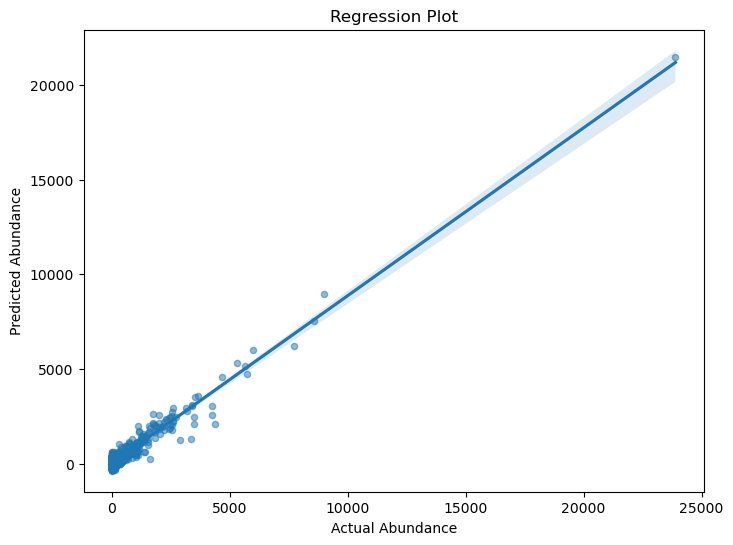

In [63]:
test_data = pd.read_excel(r"C:\Users\shraj\OneDrive\Desktop\Rubail_DM_ML.xlsx")

droplist = []

for i in test_data.columns:
    if i not in data.columns:
        droplist.append(i)
        
        
test_data = test_data.drop(droplist, axis=1)

# Detecting outliers using Z-scores
def detect_outliers_zscore(test_data, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = np.abs((test_data[col] - test_data[col].mean()) / test_data[col].std())
        outliers[col] = z_scores > threshold
    return outliers

# Preprocess the data
def preprocess_data(test_data):
    # Handle missing values
    test_data['Nc'] = test_data['Nc'].replace('*****', '0').astype('float')

    # Robust Scaling (less sensitive to outliers)
    scaler = RobustScaler()
    test_data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']] = scaler.fit_transform(test_data[['ENC', "ENC' | all (bg)", 'Gravy', 'L_aa', 'L_sym']])

    return test_data

# Train the model with polynomial features
def train_model(X, y):
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    model_test = LinearRegression()
    model_test.fit(X_poly, y)

    return model_test

if __name__ == "__main__":
    test_data = preprocess_data(test_data)

    X = test_data.drop('abundance', axis=1)
    y = test_data['abundance']

    model_test = train_model(X, y)

    # Transform the entire dataset with polynomial features
    X_poly = PolynomialFeatures(degree=2).fit_transform(X)

    # Predict on the entire dataset
    y_pred = model_test.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mse)

    print("R-squared (R²):", r_squared)
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)

plt.figure(figsize=(8, 6))
sns.regplot(x=y, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot')
plt.show()

In [64]:
# Print regression equation as a text diagram
def print_regression_diagram(model, feature_names):
    # Extract coefficients and features for the regression equation
    coef = model.coef_
    equation = "y = {:.4f}".format(model.intercept_)
    for i, (c, f) in enumerate(zip(coef[1:], feature_names[1:])):
        equation += " + {:.4f} * {}".format(c, f)

    # Create a text-based diagram
    diagram = "Regression Equation:\n"
    diagram += "+" + "-" * 50 + "+\n"
    diagram += "| {:<50} |\n".format(equation)
    diagram += "+" + "-" * 50 + "+"

    # Print the text diagram
    print(diagram)

# Example usage
# Assuming you have already trained the model and have feature_names
print_regression_diagram(model_train, X.columns)


Regression Equation:
+--------------------------------------------------+
| y = 227788833561.3133 + -44763094807.7026 * C3s + -44618264126.1435 * A3s + -47692187298.4907 * G3s + -43402163924.7972 * CAI + -40086034.8223 * Fop + -696721788.8870 * Nc + 12494481808.4301 * GC3s + -1068751248.7455 * GC + 13579796712.7001 * L_sym + 7800919497.1080 * L_aa + 12880163259.4667 * Gravy + -3276107586.1323 * Aromo + 4361895844.6086 * ENC + 7142762986.9327 * ENC' | all (bg) + -1099958573.9820 * Ala_GCU + 7990374830.4492 * Ala_GCC + 3210733806.0424 * Ala_GCA + 830834988.3440 * Ala_GCG + -52770695668.4542 * Cys_UGU + -45845247422.1599 * Cys_UGC + -33782106118.8634 * Asp_GAU + 18692401023.8941 * Asp_GAC + 2107926332.6331 * Glu_GAA + 2640383639.6325 * Glu_GAG + 5034914340.0312 * Phe_UUU + -9435446738.9793 * Phe_UUC + -2124634565.0300 * Gly_GGU + 1132489937.4196 * Gly_GGC + -929147435.5396 * Gly_GGA + -8706916.0770 * Gly_GGG + 465616794.8365 * His_CAU + 11789994125.1339 * His_CAC + -3695720604.5433 * Ile_

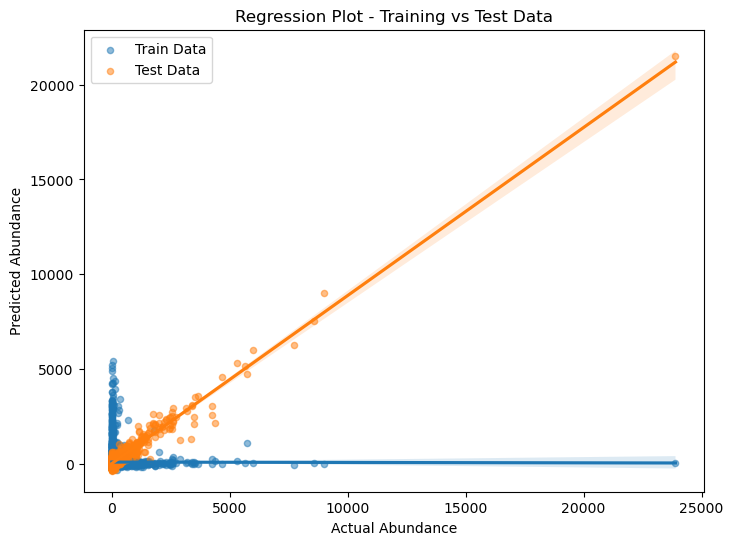

In [65]:
plt.figure(figsize=(8, 6))

# Plotting the regression plot for the training data
sns.regplot(x=y[:len(y_pred_train)], y=y_pred_train, scatter_kws={'s': 20, 'alpha': 0.5}, label='Train Data')

# Plotting the regression plot for the test data
sns.regplot(x=y[:len(y_pred)], y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5}, label='Test Data')

plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot - Training vs Test Data')
plt.legend()
plt.show()


# Regression Plot for Training Data

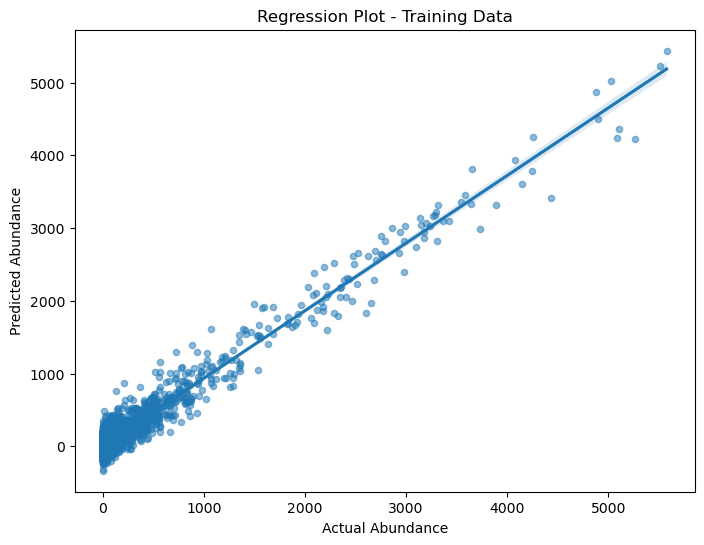

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=y_pred_train, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot - Training Data')
plt.show()


# Regression Plot for Test Data

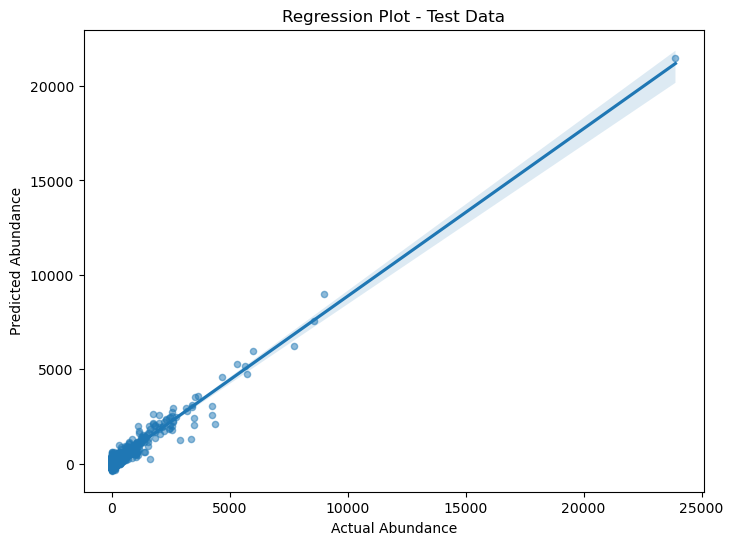

In [67]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual Abundance')
plt.ylabel('Predicted Abundance')
plt.title('Regression Plot - Test Data')
plt.show()


# Visualize the residuals for the test dataset.

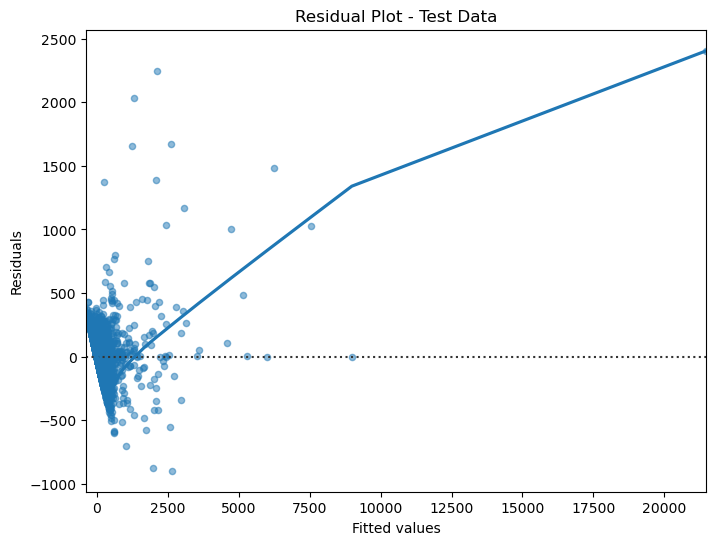

In [68]:
residuals_test = y - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals_test, lowess=True, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Test Data')
plt.show()


# Line Graph - Actual vs. Predicted Abundance for Training Data

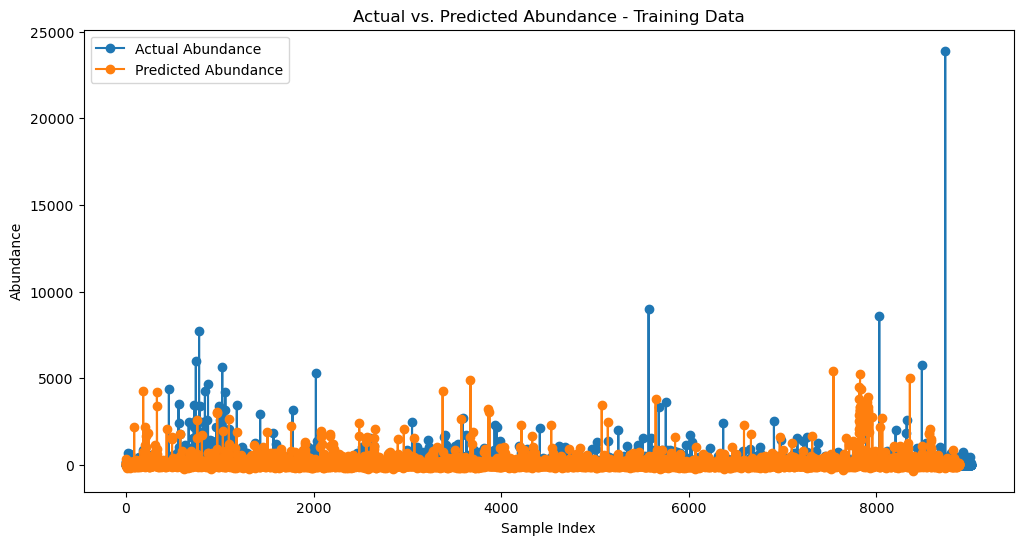

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Abundance', marker='o')
plt.plot(y_pred_train, label='Predicted Abundance', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Abundance')
plt.title('Actual vs. Predicted Abundance - Training Data')
plt.legend()
plt.show()


# Line Graph - Actual vs. Predicted Abundance for Test Data

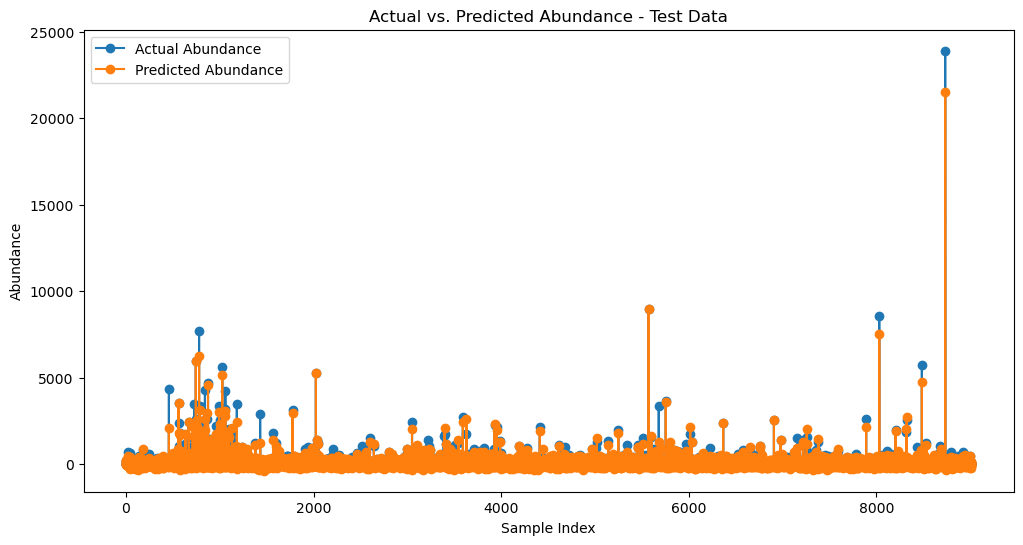

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Abundance', marker='o')
plt.plot(y_pred, label='Predicted Abundance', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Abundance')
plt.title('Actual vs. Predicted Abundance - Test Data')
plt.legend()
plt.show()


# Show the distribution of predicted abundances using a pie chart

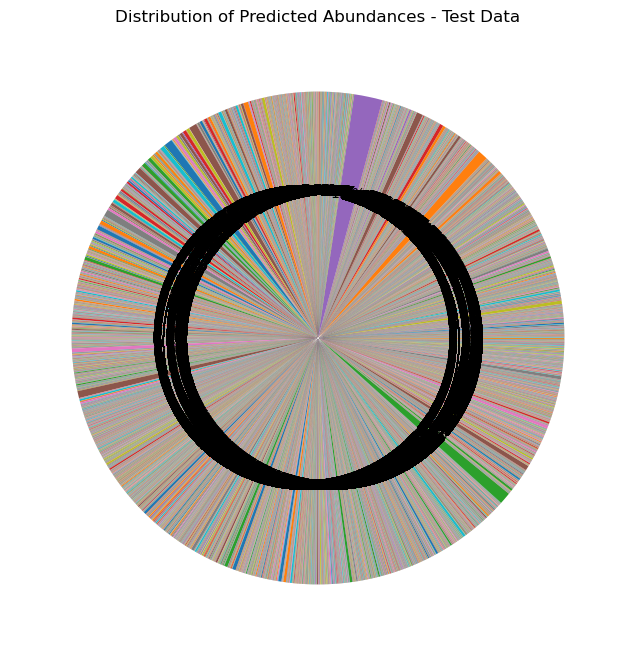

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(np.abs(y_pred), labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Predicted Abundances - Test Data')
plt.show()


# Histogram of Abundance Values in the Test Data
Visualize the distribution of actual and predicted abundance values in the test dataset using histograms.

<module 'matplotlib.pyplot' from 'C:\\Users\\shraj\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

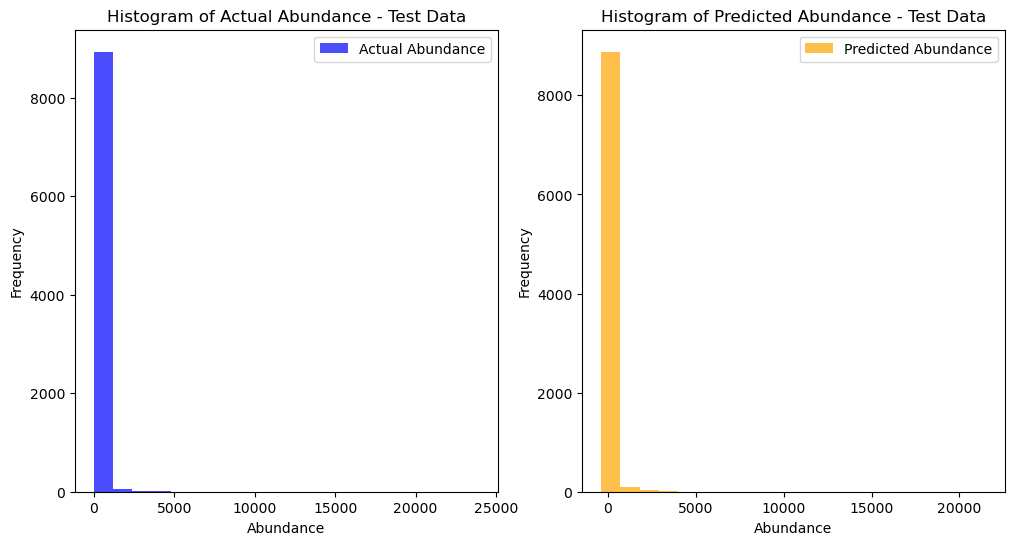

In [73]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y, bins=20, color='blue', alpha=0.7, label='Actual Abundance')
plt.title('Histogram of Actual Abundance - Test Data')
plt.xlabel('Abundance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=20, color='orange', alpha=0.7, label='Predicted Abundance')
plt.title('Histogram of Predicted Abundance - Test Data')
plt.xlabel('Abundance')
plt.ylabel('Frequency')
plt.legend()

plt


# Bar Chart of Model Performance Metrics
Visualize the performance metrics of your model using a bar chart.

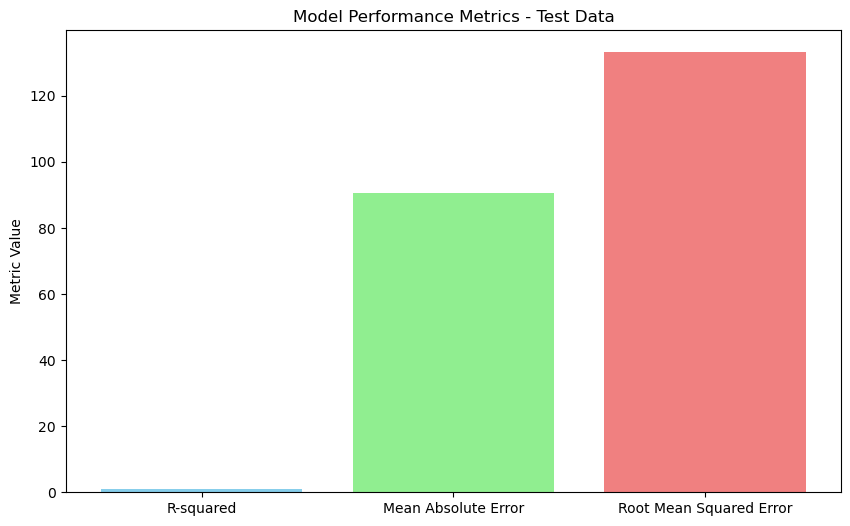

In [74]:
metrics_names = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error']
metrics_values = [r_squared, mae, rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Metrics - Test Data')
plt.ylabel('Metric Value')
plt.show()


# Pairwise Scatter Plot for Selected Features
Visualize the relationships between pairs of features in a scatter plot.

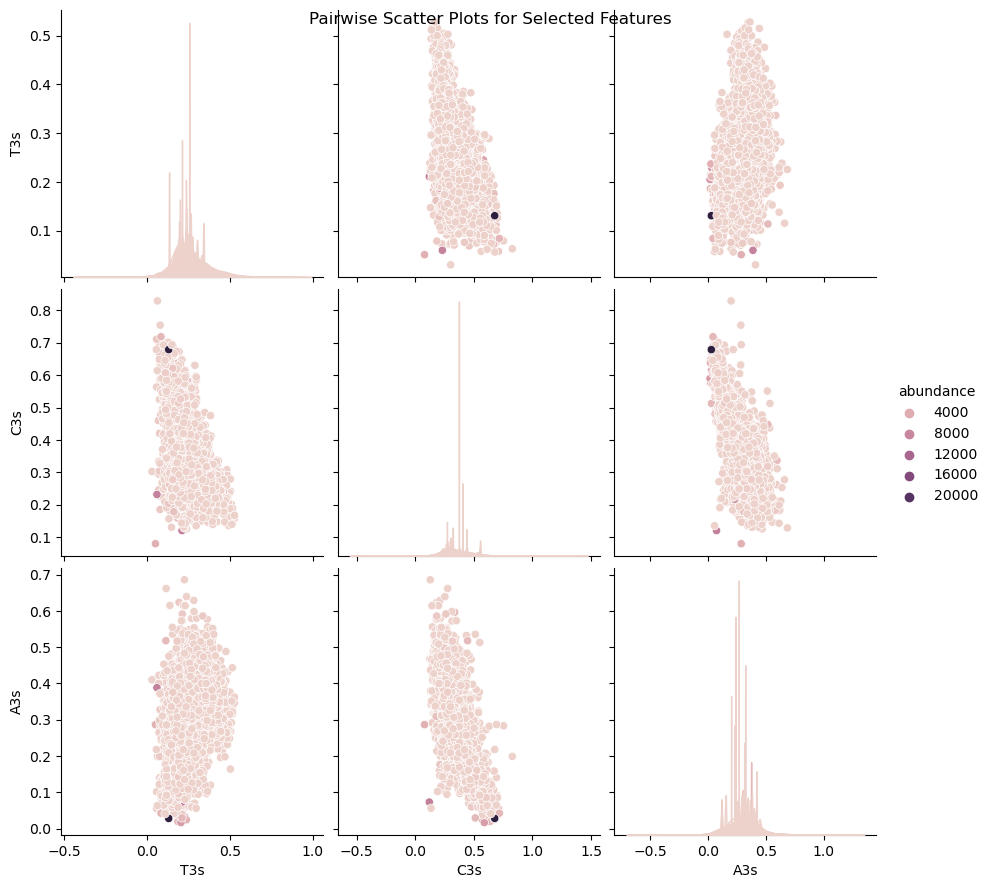

In [75]:
#plot scatter plots for the first three features
selected_features = X.columns[:3]#you can edit the number of features you want to get the scatter plots for
sns.pairplot(test_data, vars=selected_features, hue='abundance', height=3)
plt.suptitle('Pairwise Scatter Plots for Selected Features')
plt.show()


# Violin Plot for Abundance Distribution
Visualize the distribution of actual and predicted abundances using a violin plot.

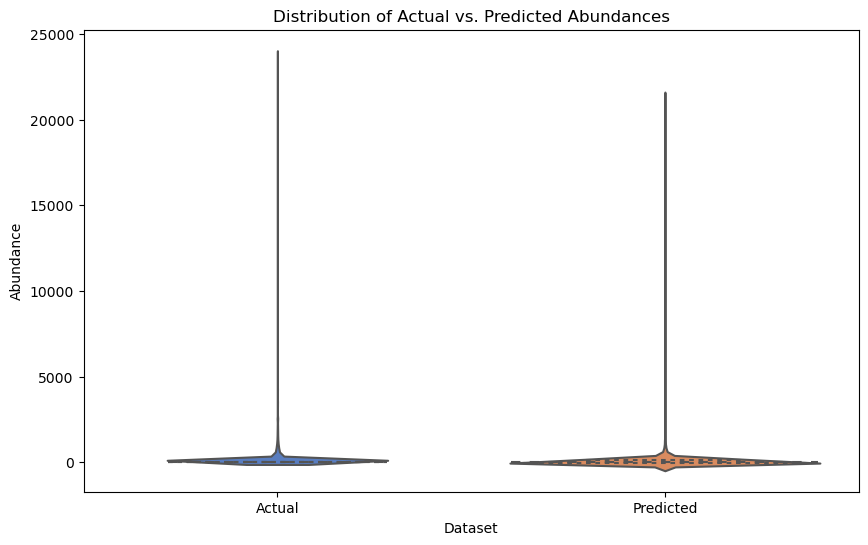

In [76]:
# we y and y_pred as pandas Series
actual_data = pd.DataFrame({'Dataset': 'Actual', 'Abundance': y})
predicted_data = pd.DataFrame({'Dataset': 'Predicted', 'Abundance': y_pred})

# Combine the actual and predicted data into a single DataFrame
combined_data = pd.concat([actual_data, predicted_data], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Dataset', y='Abundance', data=combined_data, inner='quartile', palette='muted')
plt.title('Distribution of Actual vs. Predicted Abundances')
plt.show()

